# LASER-JB Prototype QuickStart

## Single Node Calibration

### Prerequisites

This notebook assumes you have found yourself to the ```jb``` folder in the ```jbloedow/end_of_may_wip``` branch in the ```InstituteforDiseaseModeling/laser``` repo. And that you have run
```
make setup
```
and selected the "CCS" option
And ```pushd```-ed or ```cd```-ed to the ```/var/tmp/sandbox``` directory.

### imports

We're going to import the local python scripts we use to initialize & run the model. We're going to use help to show the contents of ```demographics_settings.py``` and ```settings.py```. These are just key value pairs.

The demographics of the model will be defined by:
1) the contents of ```demographics_settings.pop_file``` which is a compressed csv file ```modeled_pop.csv.gz``` which you can inspect.
2) ```fits.npy``` which is a small file with the slope and intercept of lines which have been fit to the declining population of the EULA population based on a EULA age of 5 years old. 

The ```make setup``` step processed the contents of ```demographics_settings.py``` to make the above model input files. You can see that we are modeling a ```single node``` with a population of ```2.4 million``` people. You can change those values and run ```make``` again in a terminal if you want. This notebook assumes the values documented here.

In [1]:
%matplotlib inline

import sir_numpy_c as model
import demographics_settings
import settings
import report
from measles import run_simulation
help(demographics_settings)
help(settings)

Help on module demographics_settings:

NAME
    demographics_settings - # Pop & Nodes if building pop from params

DATA
    cbr_file = 'cbrs.csv'
    eula_age = 5
    eula_file = 'eula_binned.csv'
    eula_pop_fits = 'fits.npy'
    nodes = [0]
    num_nodes = 1
    pop = 2400001
    pop_file = 'modeled_pop.csv.gz'

FILE
    /root/work/sandbox/demographics_settings.py


Help on module settings:

NAME
    settings

DATA
    attraction_probs_file = 'attraction_probabilities.csv'
    base_infectivity = 1.48
    burnin_delay = 30
    campaign_coverage = 0.75
    campaign_day = 6000000
    campaign_node = 15
    cbr = 17.5
    dont_import_after = 1460
    duration = 7300
    expansion_slots = 20000000.0
    fertility_interval = 1
    import_cases = 3000
    infectivity_multiplier = [0.0, 0.0, 0.06, 0.12, 0.18, 0.24, 0.3, 0.2, ...
    migration_fraction = 0
    migration_interval = 1
    mortality_interval = 1
    report_filename = 'simulation_output.csv'
    report_start = 1460
    ria_inter

*Timings*
- duration: Total Duration
- burnin_delay: When to start seeding
- dont_import_after: When to stop re-seeding
- report_start: When to start reporting
 
*Infectivity*
- base_infectivity: Tunable parameter for shed contagion per infectious person per day.
- seasonal_multiplier: Tunable parameter to scale he seasonality of infection.
- infectivity_multiplier: Seasonality of infection. Can plot this array to get a visual sense.

*Run-Time Demgraphics*
- cbr: Crudge birth rate if using constant.
- expansion_slots: Number of babies expected (this may not be used anymore; calculated during init?)
- fertility_interval: Timesteps between births (defaults to 1)
- mortality_interval: Timesteps between new EULA population calculations (defaults to 1)

*Migration Parameters*
THESE ARE NOT USED FOR SINGLE NODE
- attraction_probs_file: node-to-node migration probalities, pre-generated separately, as you wish 
- migration_fraction (set to 0 for single node or zero migration)
- migration_interval (can also set to big value to disable migration)

*Interventions*
NOT USED YET
- campaign_coverage: TBD
- campaign_day: TBD
- campaign_node: TBD
- ria_interval: TBD

*Files*
- report_filename = 'simulation_output.csv'


### Initialize

Next we are going to initialize everything which means loading the model, loading the eula file, creating our "expansion slots" for agents to be born, and initializing the report output. This could be consolidated into a single function.

In [2]:
ctx = model.initialize_database() # should really be called "load model"
ctx = model.eula_init( ctx, demographics_settings.eula_age )
csv_writer = report.init()

Modeled Population Size=118784
Adding 20000000 expansion slots for future babies.
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.9/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.9/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/pyth

In [3]:
# suppress sparklines output (not working yet)
import os
os.environ["HEADLESS"] = "1"

### Run

In [4]:
run_simulation( ctx=ctx, csvwriter=csv_writer, num_timesteps=settings.duration )

T=6303
T=6304
T=6305
T=6306
T=6307
T=6308
T=6309
T=6310
T=6311
T=6312
T=6313
T=6314
T=6315
T=6316
T=6317
T=6318
T=6319
T=6320
T=6321
T=6322
T=6323
T=6324
T=6325
T=6326
T=6327
T=6328
T=6329
T=6330
T=6331
T=6332
T=6333
T=6334
T=6335
T=6336
T=6337
T=6338
T=6339
T=6340
T=6341
T=6342
T=6343
T=6344
T=6345
T=6346
T=6347
T=6348
T=6349
T=6350
T=6351
T=6352
T=6353
T=6354
T=6355
T=6356
T=6357
T=6358
T=6359
T=6360
T=6361
T=6362
T=6363
T=6364
T=6365
T=6366
T=6367
T=6368
T=6369
T=6370
T=6371
T=6372
T=6373
T=6374
T=6375
T=6376
T=6377
T=6378
T=6379
T=6380
T=6381
T=6382
T=6383
T=6384
T=6385
T=6386
T=6387
T=6388
T=6389
T=6390
T=6391
T=6392
T=6393
T=6394
T=6395
T=6396
T=6397
T=6398
T=6399
T=6400
T=6401
T=6402
T=6403
T=6404
T=6405
T=6406
T=6407
T=6408
T=6409
T=6410
T=6411
T=6412
T=6413
T=6414
T=6415
T=6416
T=6417
T=6418
T=6419
T=6420
T=6421
T=6422
T=6423
T=6424
T=6425
T=6426
T=6427
T=6428
T=6429
T=6430
T=6431
T=6432
T=6433
T=6434
T=6435
T=6436
T=6437
T=6438
T=6439
T=6440
T=6441
T=6442
T=6443
T=6444
T=6445

Quickly verify that simulation_output.csv was written.

In [5]:
print(os.path.getsize('simulation_output.csv'))

188006


### Visualize some outputs

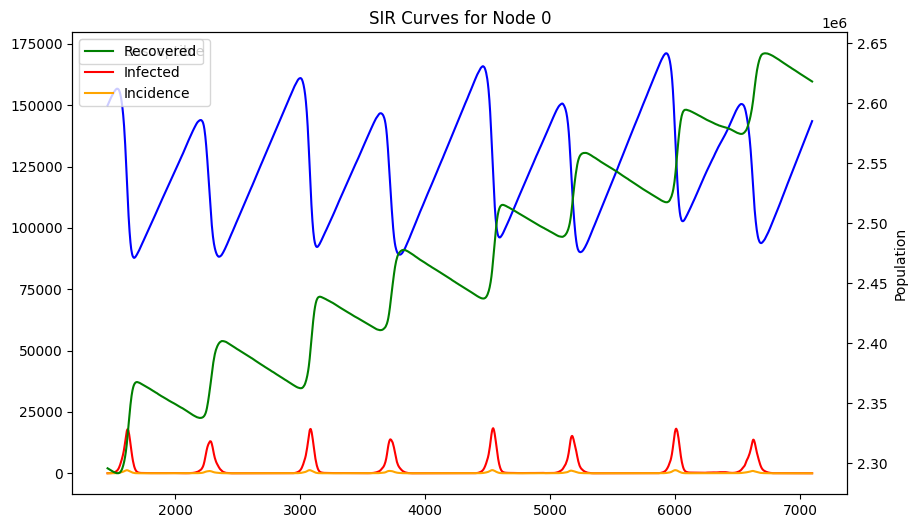

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_sir_curves(csv_file="simulation_output.csv", node_id=0):
    # Load data from CSV file
    df = pd.read_csv(csv_file)

    # Filter data for the specified node
    node_data = df[df['Node'] == node_id]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot SIR curves
    ax1.plot(node_data['Timestep'], node_data['Susceptible'], label='Susceptible', color='blue')
    ax1.plot(node_data['Timestep'], node_data['Infected'], label='Infected', color='red')
    ax1.plot(node_data['Timestep'], node_data['New Infections'], label='Incidence', color='orange')

    ax2 = ax1.twinx()
    ax2.plot(node_data['Timestep'], node_data['Recovered'], label='Recovered', color='green')
    ax2.set_ylabel('Recovered count')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Set plot labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Population')
    plt.title(f'SIR Curves for Node {node_id}')
    plt.legend()

    # Show the plot
    plt.show()

plot_sir_curves()

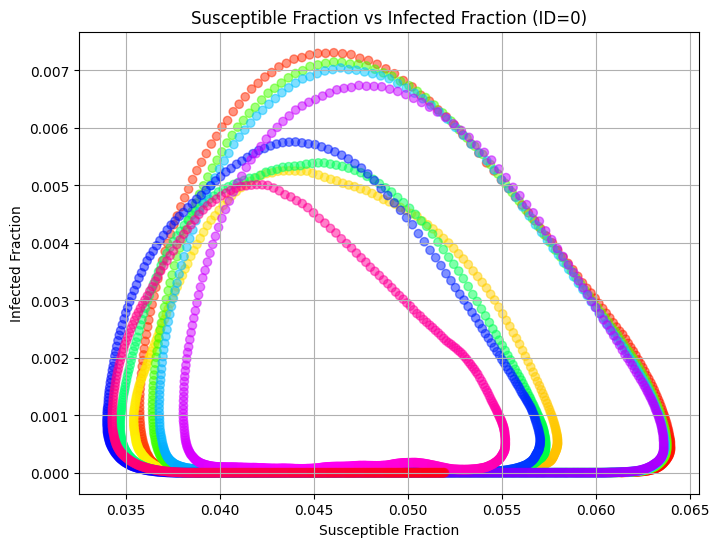

In [7]:
def plot_si_orbitals(
    csv_file = "simulation_output.csv", 
    burnin = 365*4,
    node_id = 0,
    normalize = False
):

    df = pd.read_csv(csv_file)
    df_filtered = df[df['Timestep'] > int(burnin)]
    df_filtered = df_filtered[df_filtered['Node'] == node_id]
    if normalize:
        total_population = df_filtered["Susceptible"] + df_filtered["Infected"] + df_filtered["Recovered"]
        df_filtered.loc[:, "Susceptible"] = df_filtered["Susceptible"] / total_population
        df_filtered.loc[:, "Infected"] = df_filtered["Infected"] / total_population
        label = "Fraction"
    else:
        df_filtered.loc[:, "Susceptible"] = df_filtered["Susceptible"]
        df_filtered.loc[:, "Infected"] = df_filtered["Infected"]
        label = "Population"

    # Step 3: Plot the Data
    plt.figure(figsize=(8, 6))
    colors=np.linspace(0, 1, len(df_filtered["Susceptible"]))
    plt.scatter(df_filtered["Susceptible"], df_filtered["Infected"], alpha=0.5, c=colors, cmap="hsv")
    plt.title(f"Susceptible {label} vs Infected {label} (ID={node_id})")
    plt.xlabel(f"Susceptible {label}")
    plt.ylabel(f"Infected {label}")
    plt.grid(True)
    plt.show()
    
plot_si_orbitals(normalize=True)

## Calibration

We're going to use Optuna as our framework. We will try to get it to find input values of base_infectivity and seasonal_multiplier which produce the expected number of mean yearly cases, and also a biennial periodicity. The target outputs are specified in this small metrics_ref.csv file we create now.
Create a 2-column, 2-row table with pre-defined values and save it as `metrics_ref.csv`.

Define the data for the table:

In [8]:
data = {
    "metric": ["mean_new_infs_per_year", "max_wavelet_power_period"],
    "value": [52000, 2.0]
}

Convert the data into a DataFrame:

In [9]:
df_metrics_ref = pd.DataFrame(data)

Save the DataFrame to a CSV file:

In [10]:
df_metrics_ref.to_csv('metrics_ref.csv', index=False)

Read and display the created CSV to verify:

In [11]:
df_loaded = pd.read_csv('metrics_ref.csv')
df_loaded

,metric,value
0,mean_new_infs_per_year,52000.0
1,max_wavelet_power_period,2.0


The simulation is run in the run_simulation function below. A key piece we add here is the post_proc.py script which calculates the measured values of mean_new_infections_by_year and max_wavelet_power_period (in years). We run just 20 trials here or otherwise DeepNote thinks it's been running too long.

Note that a single node simulation for 100k agents at 20 years can run in 30 seconds but in the notebook it takes a little longer.

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna

# Load reference/target values from metrics_ref.csv
reference_values = pd.read_csv('metrics_ref.csv', index_col='metric').to_dict()['value']

# Define the objective function to minimize the difference between simulated and reference values
def objective(trial):
    # Define the ranges for the parameters A, B, and C
    base_infectivity = trial.suggest_float('base_infectivity', 0.75, 3.0)
    migration_fraction = 0 # trial.suggest_float('migration_fraction', 0.005, 0.10)
    seasonal_multiplier = trial.suggest_float('seasonal_multiplier', 0.5, 1.5)

    # Simulate the disease model with the chosen parameters and obtain the metrics
    # Replace this with your actual simulation code
    simulated_values = simulate_disease_model(base_infectivity, migration_fraction, seasonal_multiplier)
    print( f"simulated_values = {simulated_values}" )
    print( f"reference_values = {reference_values}." )

    weights = {
        "mean_ccs_fraction_big_cities": 4.0,  # Adjust the weight factor as needed
        # Add weights for other metrics if necessary
    }
    diffs = []
    err = 0
    #for metric in reference_values:
    for metric in simulated_values:
        ref_val = float(reference_values[metric])
        if metric in weights:
            weight = weights[metric]
        else:
            weight = 1.0  # Default weight if not specified

        if ref_val > 100:
            diff = 1 - float(simulated_values[metric]) / ref_val
        else:
            diff = np.fabs(float(simulated_values[metric]) - ref_val)
        err += weight * np.abs(diff)
    print( f"err={err}." )

    # Calculate the objective score (sum of absolute differences)
    objective_score = err # np.abs(diff).sum()
    print( f"objective_score={objective_score}" )

    return objective_score

def metrics_csv_to_json():
    import csv
    import json

    # Initialize an empty dictionary to store the data
    json_dict = {}

    # Open the CSV file and read its contents
    with open('metrics.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row
        for row in reader:
            key, value = row
            json_dict[key] = value
    return json_dict

# Function to simulate the disease model with given parameters
def simulate_disease_model(base_infectivity, migration_fraction, seasonal_multiplier):
    ctx = model.initialize_database() # should really be called "load model"
    ctx = model.eula_init( ctx, demographics_settings.eula_age )
    csv_writer = report.init()

    try:
        run_simulation( ctx=ctx, csvwriter=csv_writer, num_timesteps=settings.duration,sm=seasonal_multiplier, mf=migration_fraction, bi=base_infectivity )
    except Exception as ex:
        print( f"Model crashed: {ex}." )
        return float('inf')
    import post_proc as pp
    pp.analyze()
    return metrics_csv_to_json()

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:


if __name__ == "__main__":
    # Create a study object and optimize the objective function
    study = optuna.create_study(
            direction='minimize',
            #study_name="no-name-695246b7-19e6-4833-bcb3-33d78af42d2d",
            storage='sqlite:///laser_ew.db',
            load_if_exists=True
        )
    study.optimize(objective, n_trials=15) # change to 100 or 200 once you have it running

    # Print the best parameters found
    print("Best parameters:", study.best_params)

    # Save the best parameters and corresponding simulated values to metrics.csv
    #best_values = simulate_disease_model(migration_fraction=0.0, seasonal_multiplier=study.best_params['seasonal_multiplier'], base_infectivity=study.best_params['base_infectivity'] )
    # Save the best values which are a dict to a CSV file
    #best_values = pd.DataFrame.from_dict(best_values, orient='index')
    #best_values.to_csv('calibrated.csv')

    # None of these work
    # Plot optimization history
    optuna.visualization.plot_optimization_history(study)
    plt.show()

    # Plot slice plot
    optuna.visualization.plot_slice(study)
    plt.show()

    # Plot parallel coordinate plot
    optuna.visualization.plot_parallel_coordinate(study)
    plt.show()

    # Plot parameter importance
    optuna.visualization.plot_param_importances(study)
    plt.show()

T=6309
T=6310
T=6311
T=6312
T=6313
T=6314
T=6315
T=6316
T=6317
T=6318
T=6319
T=6320
T=6321
T=6322
T=6323
T=6324
T=6325
T=6326
T=6327
T=6328
T=6329
T=6330
T=6331
T=6332
T=6333
T=6334
T=6335
T=6336
T=6337
T=6338
T=6339
T=6340
T=6341
T=6342
T=6343
T=6344
T=6345
T=6346
T=6347
T=6348
T=6349
T=6350
T=6351
T=6352
T=6353
T=6354
T=6355
T=6356
T=6357
T=6358
T=6359
T=6360
T=6361
T=6362
T=6363
T=6364
T=6365
T=6366
T=6367
T=6368
T=6369
T=6370
T=6371
T=6372
T=6373
T=6374
T=6375
T=6376
T=6377
T=6378
T=6379
T=6380
T=6381
T=6382
T=6383
T=6384
T=6385
T=6386
T=6387
T=6388
T=6389
T=6390
T=6391
T=6392
T=6393
T=6394
T=6395
T=6396
T=6397
T=6398
T=6399
T=6400
T=6401
T=6402
T=6403
T=6404
T=6405
T=6406
T=6407
T=6408
T=6409
T=6410
T=6411
T=6412
T=6413
T=6414
T=6415
T=6416
T=6417
T=6418
T=6419
T=6420
T=6421
T=6422
T=6423
T=6424
T=6425
T=6426
T=6427
T=6428
T=6429
T=6430
T=6431
T=6432
T=6433
T=6434
T=6435
T=6436
T=6437
T=6438
T=6439
T=6440
T=6441
T=6442
T=6443
T=6444
T=6445
T=6446
T=6447
T=6448
T=6449
T=6450
T=6451

T=6303
T=6304
T=6305
T=6306
T=6307
T=6308
T=6309
T=6310
T=6311
T=6312
T=6313
T=6314
T=6315
T=6316
T=6317
T=6318
T=6319
T=6320
T=6321
T=6322
T=6323
T=6324
T=6325
T=6326
T=6327
T=6328
T=6329
T=6330
T=6331
T=6332
T=6333
T=6334
T=6335
T=6336
T=6337
T=6338
T=6339
T=6340
T=6341
T=6342
T=6343
T=6344
T=6345
T=6346
T=6347
T=6348
T=6349
T=6350
T=6351
T=6352
T=6353
T=6354
T=6355
T=6356
T=6357
T=6358
T=6359
T=6360
T=6361
T=6362
T=6363
T=6364
T=6365
T=6366
T=6367
T=6368
T=6369
T=6370
T=6371
T=6372
T=6373
T=6374
T=6375
T=6376
T=6377
T=6378
T=6379
T=6380
T=6381
T=6382
T=6383
T=6384
T=6385
T=6386
T=6387
T=6388
T=6389
T=6390
T=6391
T=6392
T=6393
T=6394
T=6395
T=6396
T=6397
T=6398
T=6399
T=6400
T=6401
T=6402
T=6403
T=6404
T=6405
T=6406
T=6407
T=6408
T=6409
T=6410
T=6411
T=6412
T=6413
T=6414
T=6415
T=6416
T=6417
T=6418
T=6419
T=6420
T=6421
T=6422
T=6423
T=6424
T=6425
T=6426
T=6427
T=6428
T=6429
T=6430
T=6431
T=6432
T=6433
T=6434
T=6435
T=6436
T=6437
T=6438
T=6439
T=6440
T=6441
T=6442
T=6443
T=6444
T=6445

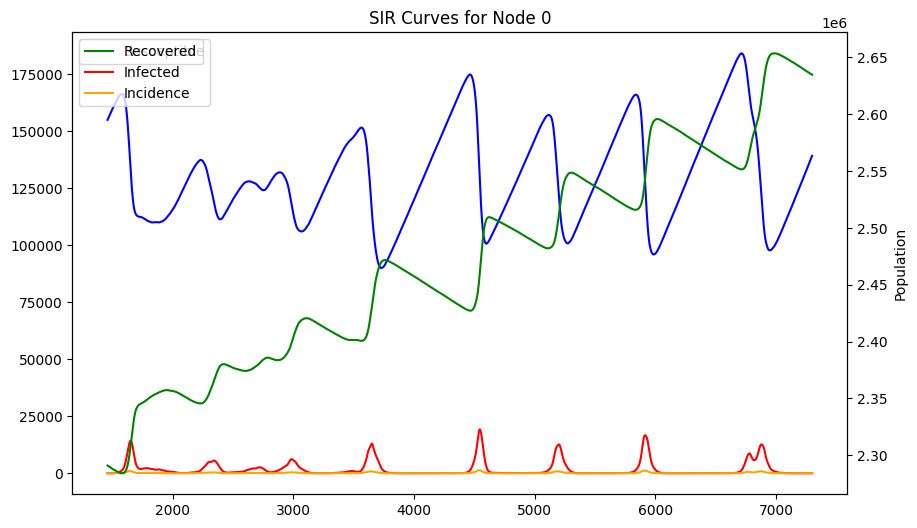

In [17]:
base_infectivity=float(input("base_infectivity?"))
seasonal_multiplier=float(input("seasonal_multiplier?"))
simulate_disease_model(base_infectivity=base_infectivity, seasonal_multiplier=seasonal_multiplier, migration_fraction=0)
plot_sir_curves()
    


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=095fb38b-bc23-4447-ab35-79eb252c9bd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>